In [594]:
# Bibliotecas necessárias para o experimento

import numpy as np
import matplotlib.pyplot as plt
from random import randint
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [595]:
def S(Ut, Uf, X):
    W = np.dot(np.transpose(Uf), Ut)
    T = np.transpose(W)
    A = np.dot(np.transpose(Ut), np.transpose(X))
    C = np.dot(A, Uf)
    L = W - np.identity(3) - 1/2*(W - np.identity(3))**2
    S = 2*np.trace(np.dot((-np.dot(T, C) + 2*C),L))
    #S = 2*np.trace(np.dot((-1/2*np.dot(C, T) - 1/2*np.dot(T, C) + 2*C),L))
    return S

In [596]:
def field(Ut, Uf, a, h, A, B):
    SA = S(Ut, Uf, A)
    SB = S(Ut, Uf, B)
    f = -a*SA-h*(SB/SA)
    return f

In [597]:
def lind(u, Ut, Uf, t, lbda):
    Ax = [[0, 0, 0],[0, 0, -1], [0, 1, 0]]
    Ay = [[0, 0, 1],[0, 0, 0], [-1, 0, 0]]
    Az = [[0, -1, 0],[1, 0, 0], [0, 0, 0]]
    B = [[-0.001*lbda, 0, 0],[0, -0.001*lbda, 0], [0, 0, -1.001*lbda]] # Amplitude Damping
    #B = [[-1.01*lbda, 0, 0],[0, -1.01*lbda, 0], [0, 0, -0.01*lbda]] # Phase Damping
    if t == 0:
        fx=10.28
        fy=10.73
        fz=40
        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
    else:
        fx=field(Ut, Uf, u[0], u[3], Ax, B)
        fy=field(Ut, Uf, u[1], u[4], Ay, B)
        fz=field(Ut, Uf, u[2], u[5], Az, B)
        P=400

        if abs(fx) > P:
            if fx < 0:
                fx = -P
            else:
                fx = P
        if abs(fy) > P:
            if fy < 0:
                fy = -P
            else:
                fy = P
        if abs(fz) > P:
            if fz < 0:
                fz = -P
            else:
                fz = P

        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
        	
    return fx,fy,fz,F

In [598]:
def rungeKutta(u, Ut, Uf, h, t, lbda):
    fx,fy,fz,k1 = lind(u, Ut, Uf, t, lbda)
    k1 = np.dot(k1,Ut)
    fx,fy,fz,k2 = lind(u, (Ut+h/2*k1), Uf, t+h/2, lbda)
    k2 = np.dot(k2,(Ut+h/2*k1))
    fx,fy,fz,k3 = lind(u, (Ut+h/2*k2), Uf, t+h/2, lbda)
    k3 = np.dot(k3,(Ut+h/2*k2))
    fx,fy,fz,k4 = lind(u, (Ut+h*k3), Uf, t+h, lbda)
    k4 = np.dot(k4,(Ut+h*k3))
    a = fx;
    b = fy;
    c = fz;
    result = Ut+(h/6)*(k1+2*k2+2*k3+k4);
    return a,b,c,result

In [599]:
def leis_controle(fx, fy, fz, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    plt.ylabel("Valores das leis de controle") 
    plt.xlabel('Tempo (u. a.)') 
    plt.plot(ts, fx, color='g', marker='o', linewidth=1, markersize=1, label="$f_x(t)$")
    plt.plot(ts, fy, color='b', marker='_', linewidth=1, markersize=1, label="$f_y(t)$")
    plt.plot(ts, fz, color='r', marker='.', linewidth=1, markersize=1, label="$f_z(t)$")
    plt.legend(loc="upper right")
    plt.title(fr"Leis de controle para $\gamma = {lbda}$")
    plt.show()

In [600]:
def fidelidade(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de fidelidade") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Fidelidade com $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.indicate_inset_zoom(axins)
    
    plt.show()

In [601]:
def distance(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de distância") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Distância entre os operadores de evolução com $\gamma = {lbda}$")

    #x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    #axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    #axins.set_xlim(0.009, 0.020)
    #axins.set_ylim(0.98, 1)

    #axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    #ax.indicate_inset_zoom(axins)
    
    plt.show()

In [602]:
def densidade(rho, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel('Valores da matriz de densidade') 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    ax.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    ax.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    ax.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Evolução da matriz de densidade $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(max(abs(rho[0])), max(abs(rho[1])), max(abs(rho[2])), max(abs(rho[3])))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    axins.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    axins.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    axins.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")

    ax.indicate_inset_zoom(axins)
    
    plt.show()

############ Informações finais do experimento ############

Valores de u: [322, 50, 161, 0.35, 0.31, 0.34]
O rf desejado é:
 [[1]
 [0]
 [0]]
O rho desejado é: [[0.5, (0.5+0j)], [(0.5+0j), 0.5]]
O vetor de Bloch encontrado é:
 [[1.00066056e+00]
 [5.15716868e-04]
 [1.98525550e-04]]
O rho alcançado foi:
 [[0.5000992627751084, (0.5003302821876446-0.0002578584338216605j)], [(0.5003302821876446+0.0002578584338216605j), 0.49990073722489153]]
A fidelidade do experimento é de: (0.9999999950734507+0j)
A fidelidade do experimento é de (fórmula dos autores do artigo): 0.99892782774955
O vetor U alcançado foi:
 [[ 1.00066056e+00 -1.16930872e-04 -8.47336641e-05]
 [ 5.15716868e-04 -9.99657634e-01 -3.21380324e-06]
 [ 1.98525550e-04  5.21904159e-06 -9.98072646e-01]]
A distância encontrada, ao final do experimento foi: 4.594520981787978e-06

############ Informações gráficas obtidas com o experimento ############



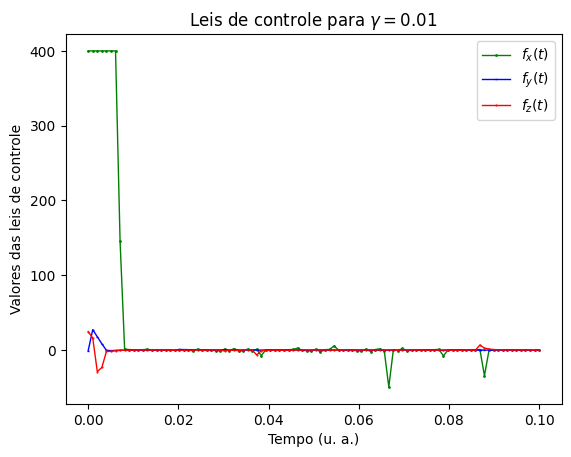

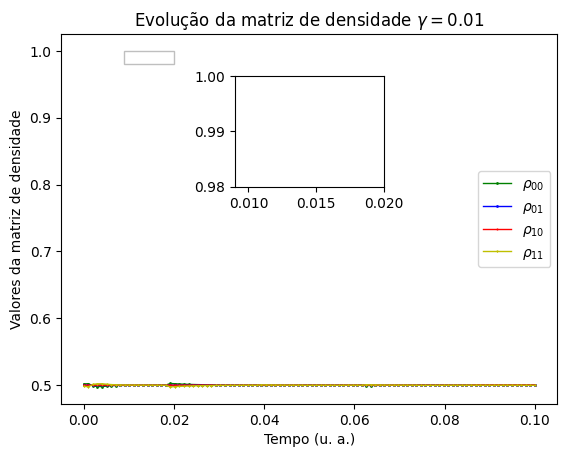

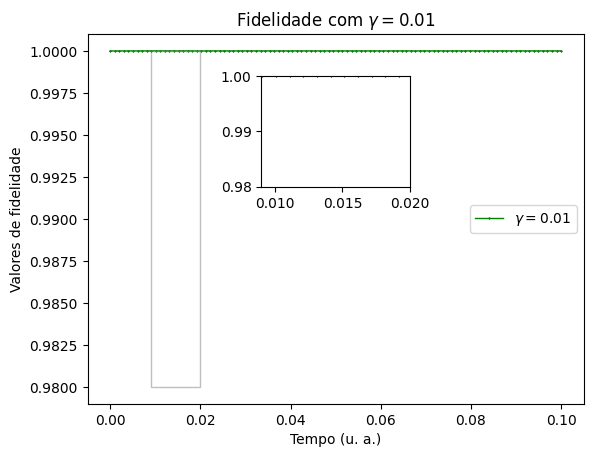

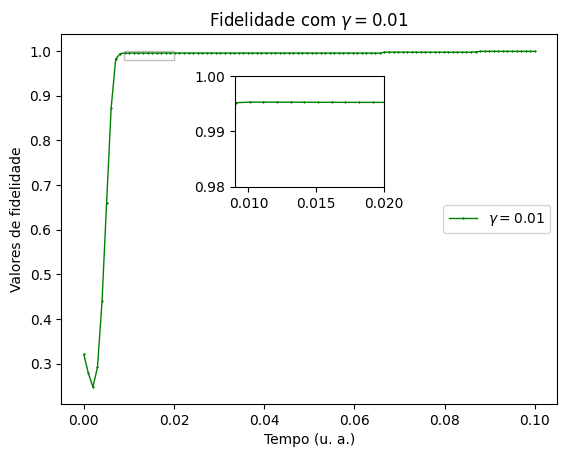

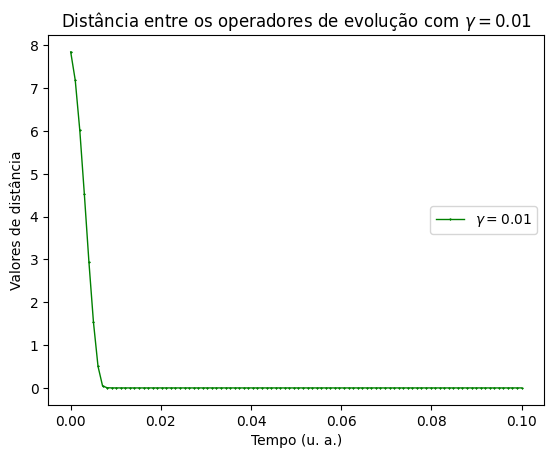

In [603]:
u = [26, 141, 74, 0.35, 0.31, 0.34]
u = [randint(1,400), randint(1,400), randint(1,400), 0.35, 0.31, 0.34]

Ut = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
Uf = [[1, 0, 0], [0, -1, 0], [0, 0, -1]]

print(f"############ Informações finais do experimento ############\n")

print(f"Valores de u: {u}")
r0 = [[1], [0], [0]]
rf = np.dot(Uf, r0)
print(f'O rf desejado é:\n {rf}')
pf = [[1/2*(1+rf[2][0]), 1/2*(rf[0][0]-1j*rf[1][0])], [1/2*(rf[0][0]+1j*rf[1][0]), 1/2*(1-rf[2][0])]]
print(f'O rho desejado é: {pf}')

h=0.001
t=0
i=0
lbda=0.01
distance_vector = []
fx_vector = []
fy_vector = []
fz_vector = []
rho_vector = np.zeros((4,100),dtype=np.complex128)
fid_vector = []
fid_autores = []
   
while t < 100:
    a,b,c,Ut = rungeKutta(u, Ut, Uf, h, t, lbda)
    D = np.linalg.norm(Ut-Uf)**2
    distance_vector.append(D)
    fx_vector.append(a)
    fy_vector.append(b)
    fz_vector.append(c)
    rt = np.dot(Ut, r0)
    pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
    rho_vector[0][t] = pt[0][0]
    rho_vector[1][t] = pt[0][1]
    rho_vector[2][t] = pt[1][0]
    rho_vector[3][t] = pt[1][1]
    fid_vector.append(np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt))))
    fid_autores.append((np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1)))
    t += 1

rt = np.dot(Ut, r0)
print(f'O vetor de Bloch encontrado é:\n {rt}')
pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
print(f'O rho alcançado foi:\n {pt}')
print(f'A fidelidade do experimento é de: {np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt)))}')
print(f'A fidelidade do experimento é de (fórmula dos autores do artigo): {(np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1))}')
print(f'O vetor U alcançado foi:\n {Ut}')
print(f'A distância encontrada, ao final do experimento foi: {D}')

print(f"\n############ Informações gráficas obtidas com o experimento ############\n")

leis_controle(fx_vector,fy_vector,fz_vector,t,lbda)
densidade(rho_vector,t,lbda)
fidelidade(fid_vector,t,lbda)
fidelidade(fid_autores,t,lbda)
distance(distance_vector,t,lbda)

In [610]:
print(f"\n############ Informações provenientes de análises gráficas ############\n")

time = 0
for i in range(len(rho_vector[0])):
    if fid_autores[i] == max((fid_autores)):
        time = i
        break
print(f"Fidelidade: {np.abs(fid_autores[time])}")
print(f"Distância: {distance_vector[time]}")
print(fr"O maior valor obtido para ρ, na primeira posição da matriz, foi {max(abs(rho_vector[0]))} para o tempo de {time/1000}, com fidelidade de {np.abs(fid_vector[time])} e de acordo com a fórmula dos autores, com fidelidade de {np.abs(fid_autores[time])}")


############ Informações provenientes de análises gráficas ############

Fidelidade: 0.9989980412337883
Distância: 1.4619392268798905e-05
O maior valor obtido para ρ, na primeira posição da matriz, foi 0.5026013652070562 para o tempo de 0.088, com fidelidade de 0.9999999999579521 e de acordo com a fórmula dos autores, com fidelidade de 0.9989980412337883


In [605]:
print(fid_autores)

[0.3209285223563227, 0.27843050734430136, 0.248082189453063, 0.29221879502844744, 0.4396761620479514, 0.659911775135059, 0.8722039384838839, 0.9817638639476645, 0.9940631022379119, 0.9951512481611924, 0.9952436028208013, 0.9952459470604714, 0.9952401278347641, 0.9952335752263132, 0.9952270171941019, 0.99522043155341, 0.9952138524716748, 0.9952072744667912, 0.9952012947120098, 0.9952051817157432, 0.9952027728353844, 0.9951989878944897, 0.995194292056862, 0.9951892143224298, 0.9951834789289649, 0.9951774722649743, 0.995171319631183, 0.9951655476350171, 0.995159427341494, 0.9951544470047972, 0.9951501302255815, 0.9951448489463323, 0.9951416671090296, 0.9951367854002164, 0.9951321543986095, 0.9951270494476593, 0.995122533956982, 0.9951325863979607, 0.9951762651821451, 0.9951707132767534, 0.9951644681390152, 0.9951580574052289, 0.9951515927882304, 0.9951451409098029, 0.9951387601897593, 0.9951326905759742, 0.9951324566074847, 0.9951260104822833, 0.9951197567144489, 0.9951149864143399, 0.995

In [606]:
print(fid_vector)

[(0.9999984590172104+0j), (0.9999973619703102+0j), (0.9999993562147824+0j), (0.9999978694410852+0j), (0.9999978265662598+0j), (0.9999989802454465+0j), (0.9999995964959161+0j), (0.999999851441729+0j), (0.999999923122689+0j), (0.9999999561496727+0j), (0.9999999751332733+0j), (0.999999986636467+0j), (0.9999999935224935+0j), (0.9999999974370948+0j), (0.9999999993957004+0j), (0.9999999999997106+0j), (0.9999999993709683+0j), (0.999999989390373+0j), (0.9999999944587217+0j), (0.9999966164209083+0j), (0.9999977018219763+0j), (0.9999984351093574+0j), (0.9999989312744533+0j), (0.9999992676657024+0j), (0.9999994961119607+0j), (0.9999996517821854+0j), (0.9999997581522515+0j), (0.9999998310444985+0j), (0.9999998813579405+0j), (0.9999999162627018+0j), (0.9999999405290989+0j), (0.9999999576897164+0j), (0.9999999699532409+0j), (0.9999999789070865+0j), (0.9999999855923019+0j), (0.999999990919684+0j), (0.9999999977341807+0j), (0.9999999954202174+0j), (0.9999999942149742+0j), (0.9999998889162591+0j), (0.9

In [607]:
print(distance_vector)

[7.846912587707167, 7.184022483896982, 6.012736505478044, 4.520334139458399, 2.9434445195516394, 1.5298537425233356, 0.5024621151605302, 0.045040118517275865, 0.004052575835280971, 0.0003904622204987694, 5.904605653986668e-05, 2.8898930839249935e-05, 2.6100214425336825e-05, 2.5928969061510872e-05, 2.5900292130612543e-05, 2.5919342715939267e-05, 2.595773946268014e-05, 2.6052270389058366e-05, 2.6191920575295546e-05, 7.692081708144081e-05, 6.021422552974652e-05, 4.9040799994665915e-05, 4.157606512999905e-05, 3.6706976266655384e-05, 3.3280088327304726e-05, 3.104094617858118e-05, 2.9585350544952317e-05, 2.870470936327238e-05, 2.8020492939144113e-05, 2.7631995177580256e-05, 2.7726940781310875e-05, 2.7297432308983512e-05, 2.7117574280901765e-05, 2.8983581925784127e-05, 2.7584331361260288e-05, 2.7215963303848513e-05, 2.713593830298217e-05, 3.798787848976463e-05, 2.964680485297529e-05, 2.9933314596136393e-05, 2.8587797634874866e-05, 2.7948882095664545e-05, 2.7616835349129422e-05, 2.744521528545

In [608]:
print(min(distance_vector))

4.3295862274534575e-06


In [609]:
print(max(fid_autores))

0.9989980412337883
